Matplotlib虽然已经是比较优秀的绘图库了，但是它有个今人头疼的问题，那就是API使用过于复杂，它里面有上千个函数和参数，属于典型的那种可以用它做任何事，却无从下手。

Seaborn基于 Matplotlib核心库进行了更高级的API封装，可以轻松地画出更漂亮的图形，而Seaborn的漂亮主要体现在配色更加舒服，以及图形元素的样式更加细腻。

可以采用最简单的直方图描述单变量的分布情况。 

Seaborn中提供了 distplot()函数，它默认绘制的是一个带有核密度估计曲线的直方图。 

distplot()函数的语法格式如下。

# 单变量曲线
- seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, color=None)
    - (1) a：表示要观察的数据，可以是 Series、一维数组或列表。

    - (2) bins：用于控制条形的数量。

    - (3) hist：接收布尔类型，表示是否绘制(标注)直方图。

    - (4) kde：接收布尔类型，表示是否绘制高斯核密度估计曲线。

    - (5) rug：接收布尔类型，表示是否在支持的轴方向上绘制rugplot。

/Users/cjz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


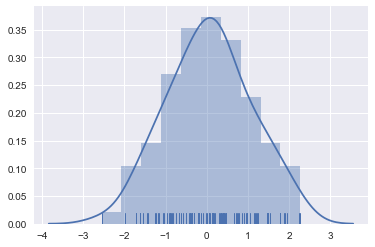

In [68]:
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()
np.random.seed(0)  # 确定随机数生成器的种子,如果不使用每次生成图形不一样
arr = np.random.randn(100)  # 生成随机数组


ax = sns.distplot(arr, bins=10, hist=True, kde=True, rug=True)  # 绘制直方图


从上图中看出：

- 直方图共有10个条柱，每个条柱的颜色为蓝色，并且有核密度估计曲线。
- 根据条柱的高度可知，位于-1-1区间的随机数值偏多，小于-2的随机数值偏少。

通常，采用直方图可以比较直观地展现样本数据的分布情况，不过，直方图存在一些问题，它会因为条柱数量的不同导致直方图的效果有很大的差异。为了解决这个问题，可以绘制核密度估计曲线进行展现。

核密度估计是在概率论中用来估计未知的密度函数，属于非参数检验方法之一，可以比较直观地看出数据样本本身的分布特征。

通过 distplot()函数绘制核密度估计曲线的示例如下

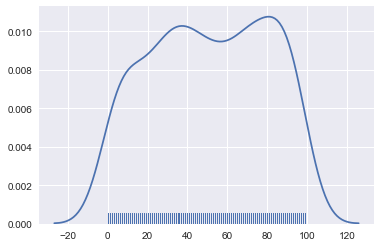

In [54]:
# 创建包含500个位于[0，100]之间整数的随机数组
array_random = np.random.randint(0, 100, 500)
# 绘制核密度估计曲线
sns.distplot(array_random, hist=False, rug=True)

# 双变量分布
seaborn.jointplot(x, y, data=None, 
                  kind='scatter', stat_func=None, color=None, 
                  ratio=5, space=0.2, dropna=True)
                  
- (1) kind：表示绘制图形的类型。
- (2) stat_func：用于计算有关关系的统计量并标注图。
- (3) color：表示绘图元素的颜色。
- (4) size：用于设置图的大小(正方形)。
- (5) ratio：表示中心图与侧边图的比例。该参数的值越大，则中心图的占比会越大。
- (6) space：用于设置中心图与侧边图的间隔大小

## 散点图

/Users/cjz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/cjz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


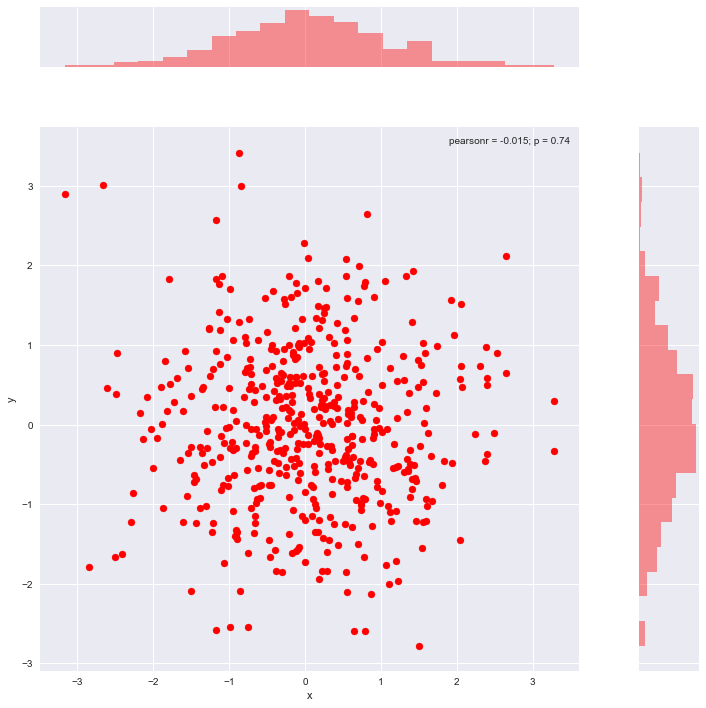

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns

# 创建DataFrame对象
dataframe_obj = pd.DataFrame({"x": np.random.randn(500),"y": np.random.randn(500)})
# 绘制散布图,stat_func默认用皮尔逊相关系数
sns.jointplot(x="x", y="y", data=dataframe_obj, kind = 'scatter',color='r', size = 10, ratio=5, space=1)

## 二维直方图

/Users/cjz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/cjz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


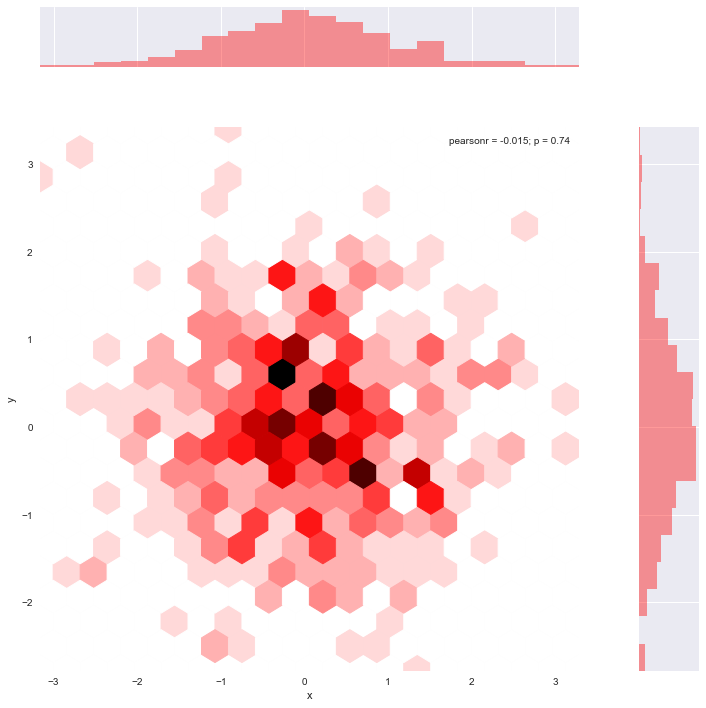

In [61]:
sns.jointplot(x="x", y="y", data=dataframe_obj, kind = 'hex',color='r', size = 10, ratio=5, space=1)

利用核密度估计同样可以查看二元分布，其用等高线图来表示。当调用jointplot()函数时只要传入ind="kde"，就可以绘制核密度估计图形，具体示例代码如下。

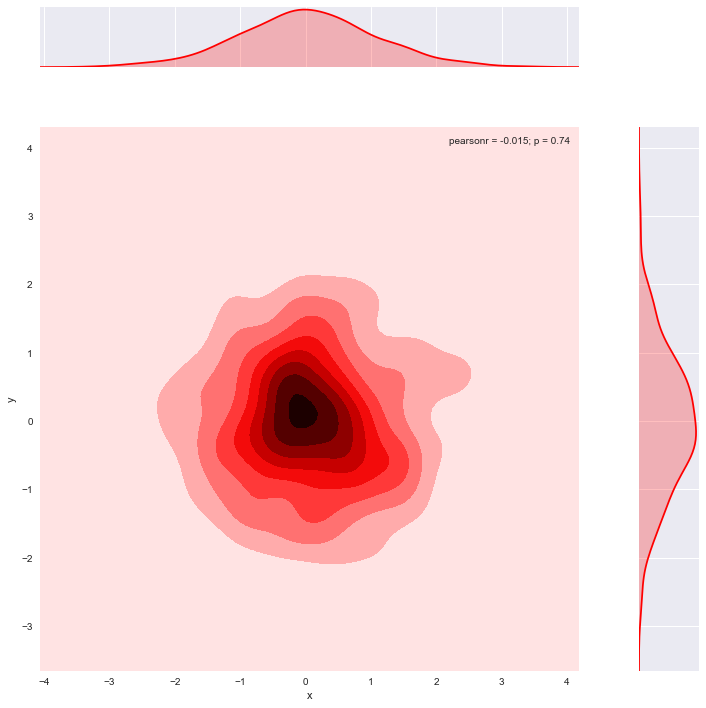

In [62]:
sns.jointplot(x="x", y="y", data=dataframe_obj, kind = 'kde',color='r', size = 10, ratio=5, space=1)


## 绘制成对的双变量分布

要想在数据集中绘制多个成对的双变量分布，则可以使用pairplot()函数实现，该函数会创建一个坐标轴矩阵，并且显示Datafram对象中每对变量的关系。另外，pairplot()函数也可以绘制每个变量在对角轴上的单变量分布。

In [74]:
# 加载seaborn中的数据集
dataset = pd.read_csv('./data/iris.data', header=None)


dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


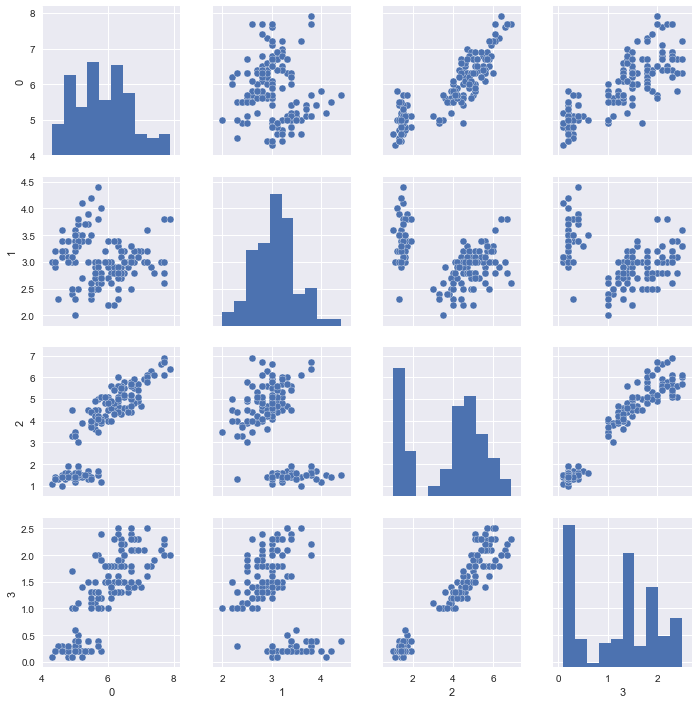

In [75]:
# 绘制多个成对的双变量分布
sns.pairplot(dataset)

# 用分类数据绘图
- 分类数据散点图: swarmplot()与 stripplot()。
    
    - seaborn.stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=False)
    - (1) x，y，hue：用于绘制长格式数据的输入。
    - (2) data：用于绘制的数据集。如果x和y不存在，则它将作为宽格式，否则将作为长格式。
    - (3) jitter：表示抖动的程度(仅沿类別轴)。当很多数据点重叠时，可以指定抖动的数量或者设为Tue使用默认值。

In [92]:
tips = pd.read_csv('./data/tips.csv')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [83]:
np.unique(tips['time'])

array(['Dinner', 'Lunch'], dtype=object)

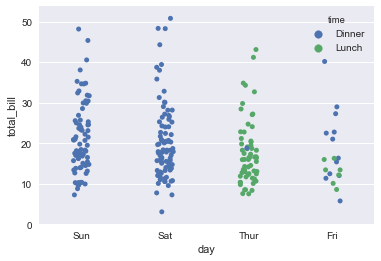

In [94]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='time', jitter=True)

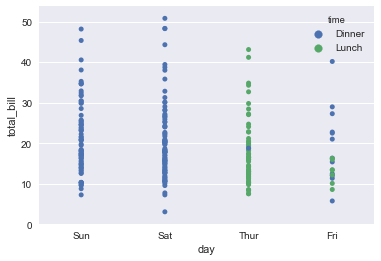

In [95]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='time', jitter=False)

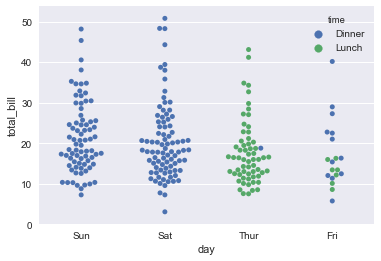

In [100]:
#swarmplot0函数绘制散点图，该函数的好处是所有的数据点都不会重叠，可以很清晰地观察到数据的分布情况，示例代码如下。
sns.swarmplot(x="day", y="total_bill", data=tips, hue='time')

# 箱型图

- sns.boxplot(x=None, y=None, hue=None, data=None, orient=None, color=None,  saturation=0.75, width=0.8)
    - (1) palette：用于设置不同级别色相的颜色变量。---- palette=["r","g","b","y"]
    - (2) saturation：用于设置数据显示的颜色饱和度。---- 使用小数表示

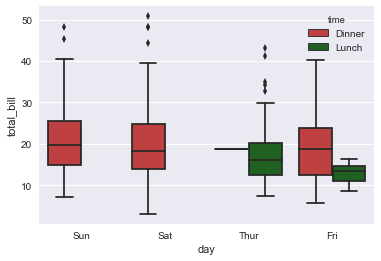

In [106]:
sns.boxplot(x="day", y="total_bill", data=tips, hue='time', palette = ['r', 'g'], saturation = 0.5)

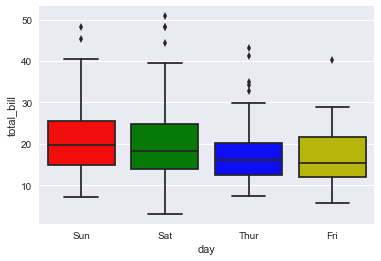

In [107]:
sns.boxplot(x="day", y="total_bill", data=tips,  palette = ['r', 'g', 'b', 'y'], saturation = 0.9)

- Thur列大部分数据都小于30，不过有5个大于30的异常值，
- Fri列中大部分数据都小于30，只有一个异常值大于40，
- Sat一列中有3个大于40的异常值，
- Sun列中有两个大于40的异常值

## 小提琴图

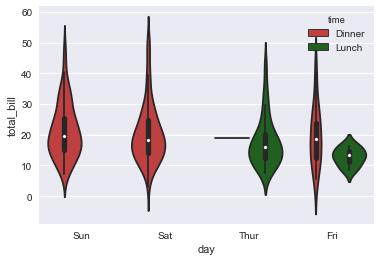

In [110]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='time', palette = ['r', 'g'], saturation = 0.5)

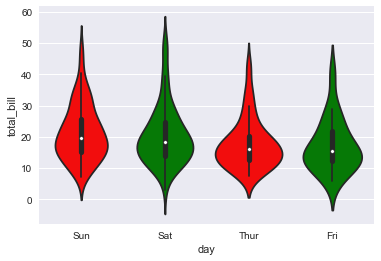

In [112]:
sns.violinplot(x="day", y="total_bill", data=tips, palette = ['r', 'g'], saturation = 0.9)

- Thur一列中位于5~25之间的数值较多，
- Fri列中位于5-30之间的较多，
- Sat-列中位于5-35之间的数值较多，
- Sun一列中位于5-40之间的数值较多。

## 绘制条形图

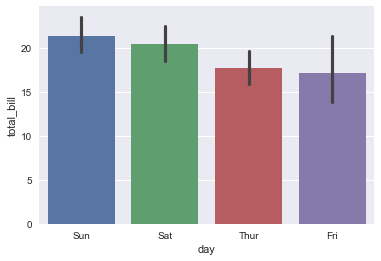

In [113]:
sns.barplot(x="day", y="total_bill", data=tips)

## 点图
可以调用 pointplot()函数进行绘制，该函数会用高度低计值对数据进行描述，而不是显示完整的条形，它只会绘制点估计和置信区间。

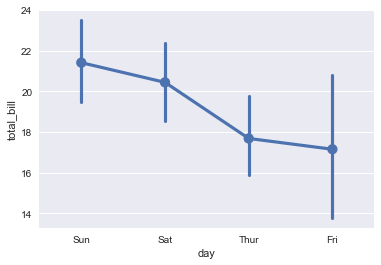

In [114]:
sns.pointplot(x="day", y="total_bill", data=tips)